In [44]:
import matplotlib, numpy, astropy, warnings
import matplotlib.pyplot as plt
%matplotlib inline  
## There are a number of relatively unimportant warnings that 
## show up, so for now, suppress them:
warnings.filterwarnings("ignore")

## Basic libraries
import requests, io
from astropy.table import Table


from IPython.display import Image as ipyImage, display

## For handling VO table type objects
from astropy.io import votable as apvot

## For reading FITS files
import astropy.io.fits as apfits

## NAVO tools
from navo_utils.registry import Registry
from navo_utils.cone import Cone
from navo_utils.image import Image
from navo_utils.spectra import Spectra

import pyvo

## Registry doesn't seem to work

See https://pyvo.readthedocs.io/en/latest/api/pyvo.registry.search.html#pyvo.registry.search for the pyvo registry search documentation.

In [2]:
from pyvo.registry import search as regsearch
chan_services=regsearch(servicetype='conesearch',keywords='chandra')
#chan_services=Registry.query(source='chanmaster',service_type='cone')
chan_services

DALQueryError: Field query: Query timed out (took too long).
Unless you know why the query took that long, please contact msdemlei@ari.uni-heidelberg.de.  Otherwise, use TAP's async mode.
Meanwhile, if this failure happened with a cross match, please try exchanging the large and the small catalog in POINT and CIRCLE.

In [19]:
chan_services=Registry.query(source='chanmaster',service_type='cone')
chan_services

waveband,short_name,ivoid,res_description,access_url,reference_url,publisher,service_type
str5,str7,str29,str2899,str78,str58,str17,str10
x-ray,Chandra,ivo://nasa.heasarc/chanmaster,"This database table contains all of the observations made by the Chandra X-Ray Observatory (CXO, formerly known as the Advanced X-ray Astrophysics Facility or AXAF) as part of the Performance Verification and Calibration (PVC) phase and also contains all of the subsequent Cycles' Guaranteed Time Observers (GTO) and General Observer (GO) targets, and any Director's Discretionary Time (DDT) targets that have been observed. It also includes scheduled and as-yet-not-scheduled targets. The HEASARC updates this database table on a twice-weekly basis by querying the database table at the Chandra X-Ray Center (CXC) website, as discussed in the Provenance section. For observations whose status is 'archived', data products can be retrieved from the HEASARC's mirror of the CXC's Chandra Data Archive (CDA). The CXC should be acknowledged as the source of Chandra data. The PVC phase was during the first few months of the CXO mission; some of the calibration observations that are for monitoring purposes will be performed in later mission cycles. All calibration data (entries with Type = CAL in this database) are placed immediately into the CXO public data archive at the Chandra X-Ray Observatory Center (CXC); please see the Web page at &amp;lt;a href=""http://asc.harvard.edu/""&amp;gt;http://asc.harvard.edu/&amp;lt;/a&amp;gt; for more information on the CXC data archive). GTO observations during Cycle 1 or any subsequent Cycle will probably occupy 100% of months 3-4, 30% of months 5-22, and 15% of the available time for the remainder of the mission. Guaranteed Time Observers will have the same proprietary data rights as General Observers (i.e., their data will be placed in the public CXC archive 12 months after they have received the data in usable form). For detailed information on the Chandra Observatory and datasets see: &amp;lt;pre&amp;gt; &amp;lt;a href=""http://cxc.harvard.edu/""&amp;gt;http://cxc.harvard.edu/&amp;lt;/a&amp;gt; for general Chandra information &amp;lt;a href=""http://cxc.harvard.edu/cda/""&amp;gt;http://cxc.harvard.edu/cda/&amp;lt;/a&amp;gt; for the Chandra Data Archive &amp;lt;a href=""http://cxc.harvard.edu/cal/""&amp;gt;http://cxc.harvard.edu/cal/&amp;lt;/a&amp;gt; for calibration information &amp;lt;a href=""http://cxc.harvard.edu/caldb/""&amp;gt;http://cxc.harvard.edu/caldb/&amp;lt;/a&amp;gt; for the calibration database &amp;lt;a href=""http://cxc.harvard.edu/ciao/""&amp;gt;http://cxc.harvard.edu/ciao/&amp;lt;/a&amp;gt; for data analysis &amp;lt;a href=""http://cxc.harvard.edu/ciao/download/""&amp;gt;http://cxc.harvard.edu/ciao/download/&amp;lt;/a&amp;gt; for analysis software &amp;lt;a href=""http://cxc.harvard.edu/ciao/threads/""&amp;gt;http://cxc.harvard.edu/ciao/threads/&amp;lt;/a&amp;gt; for analysis threads &amp;lt;a href=""http://cda.harvard.edu/chaser/""&amp;gt;http://cda.harvard.edu/chaser/&amp;lt;/a&amp;gt; for WebChaSeR &amp;lt;/pre&amp;gt;",https://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=chanmaster&amp;,https://heasarc.gsfc.nasa.gov/W3Browse/all/chanmaster.html,NASA/GSFC HEASARC,conesearch


The example from their page 

https://pyvo.readthedocs.io/en/latest/registry/index.html

cut and paste:

In [3]:
services = regsearch(keywords=['quasar'], servicetype='tap')
services

DALQueryError: Field query: Query timed out (took too long).
Unless you know why the query took that long, please contact msdemlei@ari.uni-heidelberg.de.  Otherwise, use TAP's async mode.
Meanwhile, if this failure happened with a cross match, please try exchanging the large and the small catalog in POINT and CIRCLE.

In [4]:
ros_services=Registry.query(source='rosmaster',service_type='cone')
ros_services

waveband,short_name,ivoid,res_description,access_url,reference_url,publisher,service_type
str5,str5,str28,str1173,str77,str57,str17,str10
x-ray,ROSAT,ivo://nasa.heasarc/rosmaster,"This database table contains the list of all Rontgen Satellite (ROSAT) X-Ray Telescope (XRT) pointing-mode observations for which data sets are available, i.e., it excludes the ROSAT All-Sky Survey observations. Users should consult the RASSMASTER database table for those XRT observations which were made in scanning mode during the ROSAT All-Sky Survey (RASS) phase (30 July 1990 to 25 January 1991, and 3 August 1991 to 13 August 1991). For each observation listed in this table, parameters such as the focal-plane instrument used, the data processing site, and the target name and coordinates are given, as well as the ROSAT Observation Request (ROR) number, the actual and requested exposure times, the date(s) on which the observation took place, etc. For details about the ROSAT instruments, consult the ROSAT Guest Observer Facility (GOF) website at &amp;lt;a href=""http://rosat.gsfc.nasa.gov/""&amp;gt;http://rosat.gsfc.nasa.gov/&amp;lt;/a&amp;gt; e.g., a list of the available on-line ROSAT documentation can be found at &amp;lt;a href=""http://rosat.gsfc.nasa.gov/docs/rosat/rosdocs.html""&amp;gt;http://rosat.gsfc.nasa.gov/docs/rosat/rosdocs.html&amp;lt;/a&amp;gt;",https://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=rosmaster&amp;,https://heasarc.gsfc.nasa.gov/W3Browse/all/rosmaster.html,NASA/GSFC HEASARC,conesearch


<a id="votable"></a>
# 1. VOTable:  working with VO Table objects




<a id="votable1"></a>

## 1.1 Retrieving a catalog as a VO Table



<font color='red'>Something more VOic? Use Cone to fetch all of rosmaster? Only get 10k of them. Limited where? Why would one want to fetch the full VO table? Perhaps remove this?</font>

In [5]:
params = {'name': 'rosmaster'}
r = requests.get('http://heasarc.gsfc.nasa.gov/cgi-bin/W3Browse/getvotable.pl', params=params)

## SCS seems to work fine for *their* url

This is also a lot faster:

In [6]:
#result=Cone.query(ros_services[0],coords='0,0',radius=180)
from astropy.units import Quantity
from astropy.coordinates import SkyCoord

pos = SkyCoord.from_name('NGC 4993')
size = Quantity(0.5, unit="deg")
scs_srv = pyvo.dal.SCSService('http://dc.zah.uni-heidelberg.de/arihip/q/cone/scs.xml')
scs_results = scs_srv.search(pos=pos, radius=size)
scs_results.votable.to_table()

distCol,hipno,raj2000,dej2000,pmra,pmde,err_ra,err_pmra,err_de,err_pmde,parallax,vrad,mv,km,kbin,kae,raLTP,deLTP,pmraLTP,pmdeLTP,raSTP,deSTP,pmraSTP,pmdeSTP,raHIP,deHIP,pmraHIP,pmdeHIP
deg,,deg,deg,deg / yr,deg / yr,deg,deg / yr,deg,deg / yr,deg,km / s,mag,,,,deg,deg,deg / yr,deg / yr,deg,deg,deg / yr,deg / yr,deg,deg,deg / yr,deg / yr
float64,object,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,object,bytes1,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float32,float32
0.272820119950972,64271,197.588584170833,-23.62464885,3.4638899e-06,-1.00556e-06,2.16667e-07,2.3888899e-07,1.52778e-07,1.52778e-07,1.17778e-06,--,7.7800002,,11,2,197.588586541762,-23.624647922222199,3.7166701e-06,-8.9999997e-07,197.58858354626599,-23.624648505555601,3.4027801e-06,-9.6666702e-07,197.588582782233,-23.624648133333299,3.32778e-06,-9.2499999e-07
0.38128583860037302,64133,197.16399180833301,-23.1065042194444,-3.4155601e-05,-1.46861e-05,1.88889e-07,1.86111e-07,1.25e-07,1.08333e-07,2.4388901e-06,--,6.6900001,,11,3,197.16399287139299,-23.106502741666699,-3.4044398e-05,-1.45167e-05,197.16399158786899,-23.106504294444399,-3.41778e-05,-1.46944e-05,197.16399142176601,-23.106504344444399,-3.41944e-05,-1.47e-05
0.41151954461663898,64124,197.136413979167,-23.679351263888901,5.0444401e-06,-4.3611099e-06,2.6388901e-07,2.3888899e-07,1.83333e-07,1.61111e-07,5.3055601e-07,--,8.8800001,1,11,2,197.13641429158099,-23.6793517444444,5.0777799e-06,-4.41667e-06,197.13641370921701,-23.679351111111099,5.01667e-06,-4.3444402e-06,197.136412859936,-23.679350763888898,4.93056e-06,-4.3055602e-06


## And for ours

In [14]:
pos=SkyCoord.from_name('m82')
Cone.query(ros_services[0],coords=pos,radius=0.5)

[<Table masked=True length=8>
    seq_id   instrument exposure    ra      dec        name     Search_Offset
                           s       deg      deg                              
    str11       str5     int32   float64  float64     str13        float64   
 ----------- ---------- -------- -------- ------- ------------- -------------
 RH601096N00        HRI     1117 148.4500 69.3000                     25.2549
 RP600576N00      PSPCB    17022 148.9600 69.3300 M81/M82 GROUP       20.9829
 RP600110A00      PSPCB    13121 148.9700 69.6800           M82        0.0367
 RP600110A01      PSPCB    12653 148.9700 69.6800           M82        0.0367
 RH600021N00        HRI    24645 148.9600 69.6800           M82        0.1771
 RH600021A01        HRI     9496 148.9600 69.6800           M82        0.1771
 RH600476N00        HRI     5877 148.9800 69.6800           M82        0.2411
 RH701658N00        HRI    53074 148.9500 69.6800           M82        0.3850]

In [15]:
ros_srv=pyvo.dal.SCSService(ros_services[0]['access_url'])
ros_results=ros_srv.search(pos=pos,radius=size)
ros_results.votable.to_table()

seq_id,instrument,exposure,ra,dec,name,Search_Offset
,,s,deg,deg,,
object,object,int32,float64,float64,object,float64
RH601096N00,HRI,1117,148.4500,69.3000,,25.2549
RP600576N00,PSPCB,17022,148.9600,69.3300,M81/M82 GROUP,20.9829
RP600110A00,PSPCB,13121,148.9700,69.6800,M82,0.0367
RP600110A01,PSPCB,12653,148.9700,69.6800,M82,0.0367
RH600021N00,HRI,24645,148.9600,69.6800,M82,0.1771
RH600021A01,HRI,9496,148.9600,69.6800,M82,0.1771
RH600476N00,HRI,5877,148.9800,69.6800,M82,0.2411
RH701658N00,HRI,53074,148.9500,69.6800,M82,0.3850


<a id="votable2"></a>
## 1.2 Creating a VO Table from scratch

Alternatively, we can create a table from scratch using an array of values.  

There are several ways of doing this, and there are a few object layers here, which can be confusing.  There are standard astropy Table objects, there are votable Table objects, and there are votable VOTableFile objects that might contain multiple votable Tables. Though some things can be done with generic astropy Tables, other VO operations can only be done with VO Tables or VOTableFile objects.  

This is easiest to see in an example. In the following we create an astropy Table of RA and Dec values:

In [16]:
##  Create a table with only two columns starting from an astropy Table:  
from astropy.table import Table as apTable
aptable=apTable(
    numpy.array([
            [19.0186,       46.7304],
            [20.2887,       40.4703],
            [125.886,       21.3377],
            [136.002,       21.9679],
            [141.057,       40.6372],
            [146.700,       22.0116],
            [148.785,       14.2922],
            [149.751,       17.8168],
            [175.039,       15.3270],
            [191.542,       30.7317],
            [194.913,       28.8959],
            [199.026,       41.5011],
            [206.577,       43.8511],
            [209.963,       38.1821],
            [213.556,       15.6214],
            [219.967,       42.7421],
            [226.693,       12.8502],
            [237.489,       20.8057],
            [241.519,       20.8014],
            [317.088,       18.2002],
            [329.235,       6.64845],
            [333.830,       37.3012] ]), 
    names=["RA","DEC"])
print("Table type is {ttype}".format(ttype=type(aptable)))
aptable['RA'].format=".4f"
aptable['DEC'].format=".4f"
aptable.show_in_notebook()



Table type is <class 'astropy.table.table.Table'>


idx,RA,DEC
0,19.0186,46.7304
1,20.2887,40.4703
2,125.8860,21.3377
3,136.0020,21.9679
4,141.0570,40.6372
5,146.7000,22.0116
6,148.7850,14.2922
7,149.7510,17.8168
8,175.0390,15.3270
9,191.5420,30.7317


## 1.3 Converting to a VOTableFile instance

In [17]:
## Then convert this to a VOTableFile object.
votablefile = apvot.from_table(aptable)
print(type(votablefile))
## Which contains a nested set of RESOURCES
for r in votablefile.resources:
    ## And tables (in this case, only one of each)
    mytable=r
    for t in r.tables:
        print(type(t))
        print(t)


<class 'astropy.io.votable.tree.VOTableFile'>
<class 'astropy.io.votable.tree.Table'>
        RA                DEC        
------------------ ------------------
19.018599999999999 46.730400000000003
20.288699999999999 40.470300000000002
           125.886 21.337700000000002
136.00200000000001            21.9679
141.05699999999999            40.6372
146.69999999999999 22.011600000000001
           148.785 14.292199999999999
           149.751 17.816800000000001
175.03899999999999             15.327
           191.542            30.7317
194.91300000000001 28.895900000000001
199.02600000000001 41.501100000000001
           206.577 43.851100000000002
209.96299999999999 38.182099999999998
213.55600000000001            15.6214
219.96700000000001 42.742100000000001
226.69300000000001 12.850199999999999
           237.489 20.805700000000002
241.51900000000001 20.801400000000001
317.08800000000002 18.200199999999999
329.23500000000001 6.6484500000000004
333.82999999999998 37.301200000000001


<a id="scs"></a>
# 2. SCS:  Using the Simple Cone Search to query a different catalog in a loop
The __[Simple Cone Search (SCS) protocol](http://www.ivoa.net/documents/latest/ConeSearch.html)__ is used to search a given table with a given position and radius, getting again a VOTable XML result.  See also the notebook on [using SCS](heasarc_Cone_Search.ipynb) for more details.  

In our science example, <i> we might want to search for available information for the source in the table created above in different HEASARC catalogs.</i> For example, suppose we were considering proposing for observing time with Chandra. Let's check first to see whether any of our sources were already observed by Chandra, XMM or ROSAT. 

Below, we show the search of the table 'chanmaster', the master catalog of observed Chandra targets, with a search radius of 0.1 degrees. 

<a id="scs1"></a>
The SCS protocol is quite straightforward.  The ``params`` dictionary should specify the ``RA`` and ``Dec`` for the source of interest, a search radius ``SR`` in degrees, along with the ``table`` to be queried.  An example is shown below where we loop through the first five positions specified in our source table (``aptable``) created above

<a id="scs1"></a>
The SCS protocol is quite straightforward.  The ``params`` dictionary should specify the ``RA`` and ``Dec`` for the source of interest, a search radius ``SR`` in degrees, along with the ``table`` to be queried.  An example is shown below where we loop through the first five positions specified in our source table (``aptable``) created above

In [20]:
SR=0.1 # Search radius in degrees
for row in aptable[:5]:
    print(f"Source RA, Dec =({row['RA']}, {row['DEC']})")
    table=Cone.query(chan_services[0],coords=f"{row['RA']},{row['DEC']}",radius=SR)
    if len(table[0]) > 0:
        #print "Source RA, Dec =({ra}, {dec})".format(ra=row['RA'], dec=row['DEC'])
        print(table[0]['obsid','status','ra','dec','exposure','Search_Offset'])
    else:
        #print "Source RA, Dec =({ra}, {dec})".format(ra=row['RA'], dec=row['DEC'])
        print("No Chandra Observation within {sr} degrees".format(sr=SR))
print("End of Chanmaster Search\n")
    

Source RA, Dec =(19.0186, 46.7304)
No Chandra Observation within 0.1 degrees
Source RA, Dec =(20.2887, 40.4703)
No Chandra Observation within 0.1 degrees
Source RA, Dec =(125.886, 21.3377)
obsid  status      ra      dec    exposure Search_Offset
                  deg      deg       s                  
----- -------- --------- -------- -------- -------------
 7937 archived 125.81833 21.38608    30030        4.7748
Source RA, Dec =(136.002, 21.9679)
No Chandra Observation within 0.1 degrees
Source RA, Dec =(141.057, 40.6372)
No Chandra Observation within 0.1 degrees
End of Chanmaster Search



In [26]:
SR=Quantity(0.1,unit='deg') # Search radius in degrees
chan_srv=pyvo.dal.SCSService(chan_services[0]['access_url'])
for row in aptable[:5]:
    pos=SkyCoord(row['RA'],row['DEC'],unit='deg')
    print(f"Source RA, Dec =({row['RA']}, {row['DEC']})")
    table=chan_srv.search(pos=pos,radius=SR).votable.to_table()
    if len(table) > 0:
        #print "Source RA, Dec =({ra}, {dec})".format(ra=row['RA'], dec=row['DEC'])
        print(table['obsid','status','ra','dec','exposure','Search_Offset'])
    else:
        #print "Source RA, Dec =({ra}, {dec})".format(ra=row['RA'], dec=row['DEC'])
        print("No Chandra Observation within {sr} degrees".format(sr=SR))
print("End of Chanmaster Search\n")


Source RA, Dec =(19.0186, 46.7304)
No Chandra Observation within 0.1 deg degrees
Source RA, Dec =(20.2887, 40.4703)
No Chandra Observation within 0.1 deg degrees
Source RA, Dec =(125.886, 21.3377)
obsid  status      ra      dec    exposure Search_Offset
                  deg      deg       s                  
----- -------- --------- -------- -------- -------------
 7937 archived 125.81833 21.38608    30030        4.7670
Source RA, Dec =(136.002, 21.9679)
No Chandra Observation within 0.1 deg degrees
Source RA, Dec =(141.057, 40.6372)
No Chandra Observation within 0.1 deg degrees
End of Chanmaster Search



Alternatively, give your list to the Cone.query(). It wants coordinates either as a string, a tuple/list of (ra,dec),  an astropy coordinates object, or a list of any of these:

In [27]:
SR=0.1 # Search radius in degrees
coords=numpy.transpose( [aptable['RA'].data, aptable['DEC'].data ] ).tolist()
table=Cone.query(chan_services[0],coords=coords,radius=SR)
table

[<Table masked=True length=0>
 obsid status  name     ra     dec   ...  type    pi   public_date Search_Offset
                       deg     deg   ...                   mjd                  
 int32 object object float64 float64 ... object object    int32       float64   
 ----- ------ ------ ------- ------- ... ------ ------ ----------- -------------,
 <Table masked=True length=0>
 obsid status  name     ra     dec   ...  type    pi   public_date Search_Offset
                       deg     deg   ...                   mjd                  
 int32 object object float64 float64 ... object object    int32       float64   
 ----- ------ ------ ------- ------- ... ------ ------ ----------- -------------,
 <Table masked=True length=1>
 obsid  status      name        ra    ... type    pi    public_date Search_Offset
                               deg    ...                   mjd                  
 int32   str8      str11     float64  ... str2   str8      int32       float64   
 ----- -------

In [28]:
len(table[0])

0

<a id="sia"></a>
# 3. SIA:  Using the Simple Image Access protocol.


The __[HEASARC VO](https://heasarc.gsfc.nasa.gov/docs/archive/vo/instructions.html#_accessing)__ page describes how to access SkyView images with the SIA protocol. See also the dedicated notebook on [using SIA](heasarc_Image_Access.ipynb).  

But first, how do you know what sorts of images are available?

## 3.1:  Finding SkyView SIA resources

As above, we use the Registry class to search for an image service. Suppose we know we want Swift UVOT images:

In [29]:
img_services=Registry.query(keyword='swiftuvot',service_type='image')
img_services

<Table masked=True length=1>
 waveband  short_name ...     publisher        service_type  
  str10       str9    ...       str17             str17      
---------- ---------- ... ----------------- -----------------
uv#optical  SWIFTUVOT ... NASA/GSFC HEASARC simpleimageaccess

### 3.2 Using SIA to retrieve an image from SkyView:

Now we pick one of these catalogs, SwiftUVOT, and look for our sources.  See __[the SIA definition](http://www.ivoa.net/documents/WD/SIA/sia-20040524.html)__ for usage.  In short, you specify the central position, POS, the angular SIZE, and the NAXIS, i.e., the number of ``rows,columns``.  (SkyView will bin/interpolate as needed from the archive data.)  

In [37]:
pos='{},{}'.format(aptable[0]['RA'],aptable[0]['DEC'])
#import pdb; pdb.set_trace()
print(pos)
print(img_services[0]['access_url'])
#results=Image.query('https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=swiftuvot&amp;',coords='19.,45.7',radius='0.03')
results=Image.query(service=img_services[0],coords=pos,radius='0.03')
results[0]


19.0186,46.7304
https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=swiftuvot&amp;


Survey,Ra,Dec,Dim,Size,Scale,Format,PixFlags,URL,LogicalName
str16,float64,float64,int32,object,object,str10,str1,str239,str1
swiftuvotvint,19.018599999999999,46.730429999999998,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214579964&return=FITS,1
swiftuvotvint,19.018599999999999,46.730429999999998,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214579964&nofits=1&quicklook=jpeg&return=jpeg,1
swiftuvotbint,19.018599999999999,46.730429999999998,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotbint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214580574&return=FITS,2
swiftuvotbint,19.018599999999999,46.730429999999998,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotbint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214580574&nofits=1&quicklook=jpeg&return=jpeg,2
swiftuvotuint,19.018599999999999,46.730429999999998,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214581795&return=FITS,3
swiftuvotuint,19.018599999999999,46.730429999999998,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214581795&nofits=1&quicklook=jpeg&return=jpeg,3
swiftuvotuvw1int,19.018599999999999,46.730429999999998,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuvw1int&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214582719&return=FITS,4
swiftuvotuvw1int,19.018599999999999,46.730429999999998,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuvw1int&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214582719&nofits=1&quicklook=jpeg&return=jpeg,4
swiftuvotuvw2int,19.018599999999999,46.730429999999998,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuvw2int&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214583913&return=FITS,5


In [36]:
pos=SkyCoord(aptable[0]['RA'],aptable[0]['DEC'],unit='deg')
sia_service = pyvo.dal.SIAService(img_services[0]['access_url'])
sia_results = sia_service.search(pos=pos, size=Quantity(0.03,unit='deg'))
#results=Image.query(service=img_services[0],coords=pos,radius='0.03')
sia_results.votable.to_table()


Survey,Ra,Dec,Dim,Size,Scale,Format,PixFlags,URL,LogicalName
object,float64,float64,int32,object,object,object,object,object,object
swiftuvotvint,19.018599999999999,46.730400000000003,2,[300 300],[-9.999999999999999e-05 9.999999999999999e-05],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.7304&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.03%2C0.03&projection=Tan&coordinates=J2000.0&requestID=skv1528214567056&return=FITS,1
swiftuvotvint,19.018599999999999,46.730400000000003,2,[300 300],[-9.999999999999999e-05 9.999999999999999e-05],image/tiff,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.7304&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.03%2C0.03&projection=Tan&coordinates=J2000.0&requestID=skv1528214567056&nofits=1&quicklook=tiff&return=tiff,1
swiftuvotvint,19.018599999999999,46.730400000000003,2,[300 300],[-9.999999999999999e-05 9.999999999999999e-05],image/gif,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.7304&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.03%2C0.03&projection=Tan&coordinates=J2000.0&requestID=skv1528214567056&nofits=1&quicklook=gif&return=gif,1
swiftuvotvint,19.018599999999999,46.730400000000003,2,[300 300],[-9.999999999999999e-05 9.999999999999999e-05],image/png,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.7304&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.03%2C0.03&projection=Tan&coordinates=J2000.0&requestID=skv1528214567056&nofits=1&quicklook=png&return=png,1
swiftuvotvint,19.018599999999999,46.730400000000003,2,[300 300],[-9.999999999999999e-05 9.999999999999999e-05],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.7304&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.03%2C0.03&projection=Tan&coordinates=J2000.0&requestID=skv1528214567056&nofits=1&quicklook=jpeg&return=jpeg,1
swiftuvotbint,19.018599999999999,46.730400000000003,2,[300 300],[-9.999999999999999e-05 9.999999999999999e-05],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.7304&survey=swiftuvotbint&pixels=300%2C300&sampler=LI&size=0.03%2C0.03&projection=Tan&coordinates=J2000.0&requestID=skv1528214567349&return=FITS,2
swiftuvotbint,19.018599999999999,46.730400000000003,2,[300 300],[-9.999999999999999e-05 9.999999999999999e-05],image/tiff,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.7304&survey=swiftuvotbint&pixels=300%2C300&sampler=LI&size=0.03%2C0.03&projection=Tan&coordinates=J2000.0&requestID=skv1528214567349&nofits=1&quicklook=tiff&return=tiff,2
swiftuvotbint,19.018599999999999,46.730400000000003,2,[300 300],[-9.999999999999999e-05 9.999999999999999e-05],image/gif,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.7304&survey=swiftuvotbint&pixels=300%2C300&sampler=LI&size=0.03%2C0.03&projection=Tan&coordinates=J2000.0&requestID=skv1528214567349&nofits=1&quicklook=gif&return=gif,2
swiftuvotbint,19.018599999999999,46.730400000000003,2,[300 300],[-9.999999999999999e-05 9.999999999999999e-05],image/png,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.7304&survey=swiftuvotbint&pixels=300%2C300&sampler=LI&size=0.03%2C0.03&projection=Tan&coordinates=J2000.0&requestID=skv1528214567349&nofits=1&quicklook=png&return=png,2


Extract the fields you're interested in, e.g., the URLs of the images made by skyview.  Note that specifying as we did SwiftUVOT, we get a number of different images, e.g., UVOT U, V, B, W1, W2, etc.  For each survey, there are two URLs, first the FITS IMAGE and second the JPEG:

In [39]:
table=results[0]
table['Ra'].format='.4f'
table['Dec'].format = '.4f'
table.show_in_notebook(display_length=5)

idx,Survey,Ra,Dec,Dim,Size,Scale,Format,PixFlags,URL,LogicalName
0,swiftuvotvint,19.0186,46.7304,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214579964&return=FITS,1
1,swiftuvotvint,19.0186,46.7304,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214579964&nofits=1&quicklook=jpeg&return=jpeg,1
2,swiftuvotbint,19.0186,46.7304,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotbint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214580574&return=FITS,2
3,swiftuvotbint,19.0186,46.7304,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotbint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214580574&nofits=1&quicklook=jpeg&return=jpeg,2
4,swiftuvotuint,19.0186,46.7304,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214581795&return=FITS,3
5,swiftuvotuint,19.0186,46.7304,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214581795&nofits=1&quicklook=jpeg&return=jpeg,3
6,swiftuvotuvw1int,19.0186,46.7304,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuvw1int&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214582719&return=FITS,4
7,swiftuvotuvw1int,19.0186,46.7304,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuvw1int&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214582719&nofits=1&quicklook=jpeg&return=jpeg,4
8,swiftuvotuvw2int,19.0186,46.7304,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/fits,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuvw2int&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214583913&return=FITS,5
9,swiftuvotuvw2int,19.0186,46.7304,2,[300 300],[-0.00019999999999999998 0.00019999999999999998],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuvw2int&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214583913&nofits=1&quicklook=jpeg&return=jpeg,5


In [40]:
###  Inside the table is a numpy record array that you can access like this, for example:
#print(table.array[4][8])
#  Or like this
print(table[4]['URL'])
### To download the FITS image itself:
print(table[5]['URL'])

https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214581795&return=FITS
https://skyview.gsfc.nasa.gov/cgi-bin/images?position=19.0186%2C46.73043&survey=swiftuvotuint&pixels=300%2C300&sampler=LI&size=0.06%2C0.06&projection=Tan&coordinates=J2000.0&requestID=skv1528214581795&nofits=1&quicklook=jpeg&return=jpeg


### Resulting image
You can display it in python by
(give it ~10 seconds to appear)


In [45]:
##  Note that there are bugs with some of these datasets, 
##  since they are new in SkyView.  Selecting the U-band image.
##  (The decode is needed in Python 3.5 because it comes back a byte type.)
display(ipyImage(url=table['URL'][5]))

Or download the FITS image as ``image.fits``


In [47]:
r=requests.get(table['URL'][4], stream=True)
with open('image.fits','wb') as f:
    f.write(r.content)

(If the above gives you a "time out" error, just try it again.)

Then read the fits image you just created and display it:

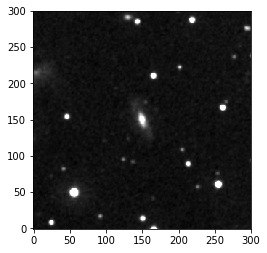

In [48]:
#hdu_list=apfits.open(table['URL'][4].decode("utf-8"))
hdu_list=apfits.open('image.fits')
plt.imshow(hdu_list[0].data, cmap='gray', origin='lower',vmax=0.1)

### Alternatively, we can use Aplpy to make an image with coordinates

In [49]:
import aplpy
gc = aplpy.FITSFigure(hdu_list)
gc.show_grayscale(stretch='log', vmin=6e-3, vmax=1.4e-1)

ModuleNotFoundError: No module named 'aplpy'

### A related example with multiple VO interfaces
A very similar example uses the SkyView SIA protocol to retrieve an image from a different survey, SDSS, which is not held on the HEASARC SkyView server but at the Barbara A. Mikulski Archive for Space Telescopes ([MAST](https://mast.stsci.edu)).  The user does not need to be aware of where the data is actually stored - under the hood, SkyView is using SIA to get the data from MAST transparently.  


In [ ]:
params['survey']='sdssg'
r = requests.get('https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl', params=params)

(It may take a few seconds for the displyed image to appear.)

In [ ]:
table=Table.read(io.BytesIO(r.content))
display(Image(url=table['URL'][1].decode("utf-8")))

<a id="tap"></a>
# 4. TAP: Using the Table Access Protocol to find VO Resources

<a id="tap1"></a>
# 4a. TAP:  Using the Table Access Protocol to find additional information on our sources
TAP is described in more detail in the dedicated [TAP notebook](heasarc_TAP_queries.ipynb).

In this example, we will use our tabulated list of 22 sources (``aptable``) we create above.  <i> Continuing with our hypothetical science example of preparing an observing proposal for these objects, we would now like to find their redshifts, e.g., to calculate exposure times based on being able to significantly detect a 10<sup>39</sup> erg/s source.</i>

First, find out what catalogs HEASARC holds that might have redshifts, specifying the query in ADQL:

In [ ]:

tap_params["query"]="""
    select a.name,b.value
      from metainfo a, metainfo b
      where
         a.type='table' and b.type='table' and
         a.relation='defaultSearchRadius' and
         b.relation='description' and
         a.name=b.name and
         b.value like '%Redshift%' 
      order by name    
      """
r = requests.get('https://heasarc.gsfc.nasa.gov/xamin/vo/tap/sync', params=tap_params)
table=Table.read(io.BytesIO(r.content))
table.show_in_notebook()

Of all the tables with redshift information, probably the ``CfA Redshift Catalog`` (``zcat``) is best for our purposes.  <i> Since these are galaxies found in close pairs or groups, we expect multiple matches at each location. </i> Let's first start with one object and search within 0.1 degree.

(See the __[information on the zcat](https://heasarc.gsfc.nasa.gov/W3Browse/galaxy-catalog/zcat.html)__ for column information. We will actually use the 'radial_velocity' column rather than the 'redshift' column.)

In [ ]:
##  Pick a radius in degrees to search around our input coordinates:
radius=0.1

query = """SELECT ra, dec, Radial_Velocity FROM zcat as cat where 
    contains(point('ICRS',cat.ra,cat.dec),circle('ICRS',{0},{1},{2}))=1
    """.format(aptable[0]['RA'],aptable[0]['DEC'],radius)
print(query)

tap_params = {
    "request":"doQuery",
    "lang":"ADQL",
    "query":"{q}".format(q=query)
    }
r = requests.get('https://heasarc.gsfc.nasa.gov/xamin/vo/tap/sync', params=tap_params)
#r.content
table=Table.read(io.BytesIO(r.content))
table['ra'].format='.4f'
table['dec'].format='.4f'
table.show_in_notebook()

### !!! in the above query, how do we know we should return "Radial_Velocity" and not "Redshift"?  i.e. how does the user know that, for zcat, the Redshift parameter is called Radial_Velocity (and given in, presumably, km/s)?

<a id="tap2"></a>
# 4b. TAP:  Cross-correlating our objects with a catalog

Now to search all of our 22 sources in ``aptable`` in one go, we need to upload ``aptable`` as a VOTable file instance to the VO service ``https://heasarc.gsfc.nasa.gov/xamin/vo/tap/sync`` and do a cross-correlation with the ``zcat``table. 

In Section 1.3 above we had already created a VOTableFile instance called ``votablefile`` from our ``aptable``. Now we need to use the ``requests`` method to upload this ``votablefile`` and use it in our TAP request.

First, create a "file-like" object from ``votablefile`` that you can give to ``requests``.  This is a bit arcane:

In [ ]:
vot_obj=io.BytesIO() # Create a file-like IO stream in memory
apvot.writeto(votablefile,vot_obj) # write the VOTable to this file-like stream
vot_obj.seek(0) # make sure you've reset seek to beginning of buffer
## 'uplt' is what we'll call it (for 'upload table') 
##   in the requests parameters below, or what you will:
files={'uplt':vot_obj}

Alternatively, you could have written ``votablefile`` to disk:
```
apvot.writeto(votablefile, "new_votable.xml")
files={'uplt':open('new_votable.xml', 'rb')}
```

In [ ]:
# NOTE THAT THIS request may take tens of seconds to complete

## The parameters below are defined in the TAP standard.  
##  The string 'uplt' is what we set above as the name
##  of the parameter containing this data, and
##  the string 'mysources' is how we refer to it in 
##  the ADQL query string:
cc_params={
    'lang': 'ADQL', 
    'request': 'doQuery',
    'upload':'mysources,param:uplt'
    }
# Define the query to cross-correlate each item in our list of source positions 
#   with zcat to find the radial velocities of the sources
cc_params["query"]="""
    SELECT cat.ra, cat.dec, Radial_Velocity 
    FROM zcat cat, tap_upload.mysources mt 
    WHERE
    contains(point('ICRS',cat.ra,cat.dec),circle('ICRS',mt.ra,mt.dec,0.1))=1
    and Radial_Velocity > 0
    ORDER by cat.ra"""
# Send the request 
r = requests.post('https://heasarc.gsfc.nasa.gov/xamin/vo/tap/sync',data=cc_params,stream=True,files=files)
mytable=Table.read(io.BytesIO(r.content))
mytable['ra'].format='.4f'
mytable['dec'].format='.4f'
mytable.show_in_notebook(display_length=10)

In mytable are the RAs and Decs of the nearest matching source in zcat. We want the RA and Dec of the source from our own aptable as well as the RA and Dec of the nearest matching source in zcat, the source offset and the radial_velocity.  So for each source in aptable, find the nearest source in mytable, extract it's ra, dec, radial_velocity and offset, and add that info as new columns in aptable.

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

capt = SkyCoord(aptable['RA']*u.degree, aptable['DEC']*u.degree)
cmyt = SkyCoord(mytable['ra']*u.degree, mytable['dec']*u.degree)
# use match_to_catalog method to match aptable sources with the nearest catalogued sources
idx, d2d, d3d = capt.match_to_catalog_sky(cmyt)  

# create new table
newaptable=aptable.copy()
radvel = mytable[idx]['radial_velocity']
newaptable['radvel']=radvel
newaptable['ra_match']=mytable[idx]['ra']
newaptable['dec_match']=mytable[idx]['dec']
newaptable['offset']=d2d.to(u.arcmin)
newaptable['ra_match'].format='.4f'
newaptable['dec_match'].format='.4f'
newaptable['offset'].format='.3f'
newaptable.show_in_notebook()

<a id="combo"></a>

# 4c. Another example with TAP table cross-correlation: Combining data from different catalogs
Now we'd like to take the redshift information (above, as a radial velocity) and determine a search radius to use for each galaxy based on its distance, so that we are are searching within a given physical distance. <i>E.g., for our science proposal, we need to check that the redshifts (or radial velocities) of the galaxies that are close on the sky (within 50 kpc physical distances) have similar distances, suggesting these are truly close in 3-dimensions and therefore potentially interacting galaxies.</i>

In [ ]:
## The radial_velocity is in km/s, and this is just c*z, so
c=3.0e5 # km/s

newaptable['redshift']=newaptable['radvel']/c  # Filling masked values with zero

physdist=0.05*u.Mpc # 50 kpc physical distance

## This needs scipy.  
from astropy.cosmology import Planck15

angDdist=Planck15.angular_diameter_distance(newaptable['redshift'])

## angDdist is returned from the astropy.cosmology module as a Quantity object, 
##  i.e. a value and a unit.  Arctan is smart enough not to operate on quantities
##  that aren't unitless.  So angDdist.value to just get the value.
angDrad=numpy.arctan(physdist/angDdist)
angDdeg=angDrad.to(u.degree)
newaptable['angDdeg']=angDdeg
newaptable['RA'].format='.4f'
newaptable['DEC'].format='.4f'
newaptable['redshift'].format='.3f'
newaptable['angDdeg'].format='.2e'
newaptable.show_in_notebook()

<a id="ssa"></a>
# 6. SSA:  Using the Simple Spectral Access protocol to retrieve spectra.

See also the [notebook](heasarc_Spectral_Access.ipynb) specific to the Simple Spectral Access __[Protocol](http://www.ivoa.net/documents/SSA/)__.

<i>Returning to our science example, suppose that we have analyzed the available Chandra image for the three matches above and discovered that one of these galaxies appears to have a potential ultraluminous X-ray source (ULX)! Now, we want to charatcterize the spectrum for this source. Therefore we will ask for a large exposure time and need to justify this by showing the spectrum of a prototypical ULX, M82 X-1. </i>


In [ ]:
import astropy.coordinates as coord
m82=coord.SkyCoord.from_name("m82")
pos='{},{}'.format(m82.ra.deg,m82.dec.deg)
params = {'table': 'chanmaster',"POS":pos,"SIZE":".01", "REQUEST":"queryData"}
r = requests.get('https://heasarc.nasa.gov/xamin/vo/ssa', params=params)
spec_table = Table.read(io.BytesIO(r.content))
spec_table.show_in_notebook()

In [ ]:
## Get the first spectrum (since it has a long-ish exposure.)
import astropy.io.fits as fits
hdu_list=fits.open(spec_table[0]['SSA_reference'].decode()) # Byte format, so just decode() to string
#hdu_list.info()
table = Table(hdu_list[1].data)
table.show_in_notebook()


In [ ]:
## Here, you just have to be familiar with the format of these spectra by reading Chandra documentation.
for i in range(len(table)):
    matplotlib.rcParams['figure.figsize'] = (6, 6)
    ax=plt.subplot(6,2,i+1)
    pha = plt.plot( table['CHANNEL'][i],table['COUNTS'][i])
    ax.set_yscale('log')
    if table['TG_PART'][i] == 1:
        instr='HEG'
    if table['TG_PART'][i] == 2:
        instr='MEG'
    if table['TG_PART'][i] == 3:
        instr='LEG'
    ax.set_title(str(table['TG_M'][i])+' '+instr)
    plt.tight_layout()


Note: The 12 plots here show all the different HEG and MEG components (+/- 3, +/- 2, and +/- 1 for each grating) for the grating data, as titled. In practice, you might want to download the fits file and use a different analysis and plotting tool to create an energy spectrum plot using SHERPA or XSPEC, etc. 

You can download the file directly using requests:

In [ ]:
## Because urllib is hard to make Python 2/3 compatible, just use requests:
r=requests.get(spec_table[0]['SSA_reference'].decode(), stream=True)
with open('my_M82_spectrum.fits','wb') as f:
    f.write(r.content)

You can then run Xspec etc. to analyze the spectrum. See the [SSA notebook](heasarc_Spectral_Access.ipynb) for that example. 